In [1]:
#Loading the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
#Load the Dataset
df = pd.read_csv('diamonds.CSV')  
df.head()



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#Data Cleaning
#Check Missing Values:
df.isnull().sum()


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

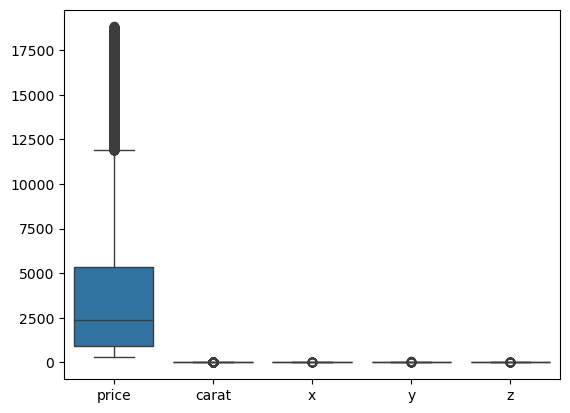

In [4]:
#Step 4: Outlier Detection & Treatment
sns.boxplot(data=df[['price', 'carat', 'x', 'y', 'z']])
plt.show()


In [5]:
#removing extreme outliers using IQR method


# Step 1: Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Step 2: Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Filter out rows with any outliers in numeric columns
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [6]:
print("Original shape:", df.shape)

# Select numeric
numeric_df = df.select_dtypes(include=[np.number])

# IQR calculation
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Outlier filtering
condition = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[condition]

print("New shape after removing outliers:", df.shape)


Original shape: (47524, 11)
New shape after removing outliers: (45864, 11)


In [7]:
#  Exploratory Data Analysis
#Summary Statistics:
df.describe()


,Unnamed: 0,carat,depth,table,price,x,y,z
count,45864.000000,45864.000000,45864.000000,45864.000000,45864.000000,45864.000000,45864.000000,45864.000000
mean,27345.690629,0.687237,61.805976,57.233883,2888.343014,5.496752,5.501821,3.398792
std,16189.108373,0.352284,1.076930,2.014788,2448.548076,0.948264,0.942397,0.587453
min,1.000000,0.200000,59.000000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,12576.750000,0.370000,61.200000,56.000000,876.000000,4.610000,4.620000,2.840000
50%,29730.500000,0.580000,61.900000,57.000000,1952.000000,5.360000,5.370000,3.300000
75%,41628.250000,1.010000,62.500000,59.000000,4416.000000,6.370000,6.370000,3.950000
max,53940.000000,1.950000,64.600000,63.500000,10255.000000,8.100000,8.210000,5.060000


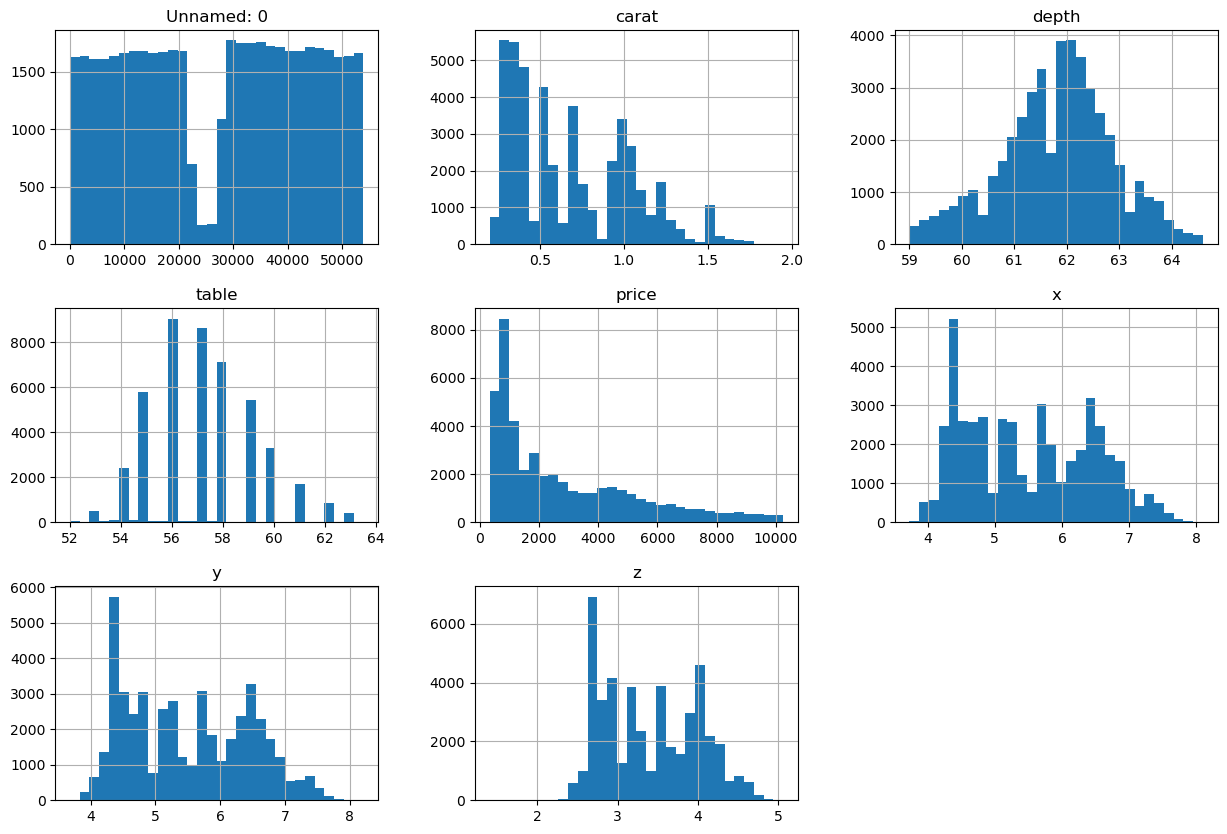

In [8]:
#Univariate Plots:
df.hist(bins=30, figsize=(15, 10))
plt.show()


<Axes: xlabel='cut', ylabel='count'>

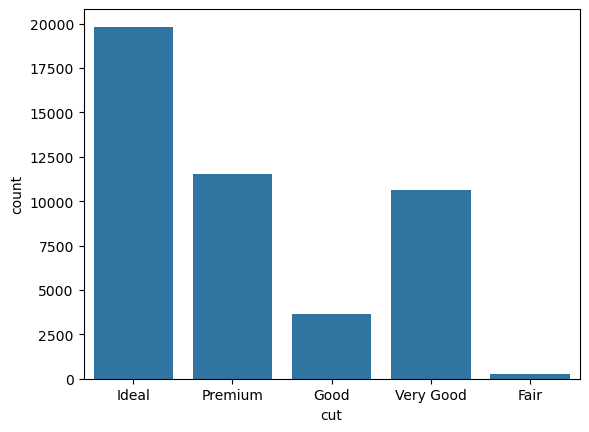

In [9]:
#Categorical Bar Plots:
sns.countplot(x='cut', data=df)


<Axes: xlabel='carat', ylabel='price'>

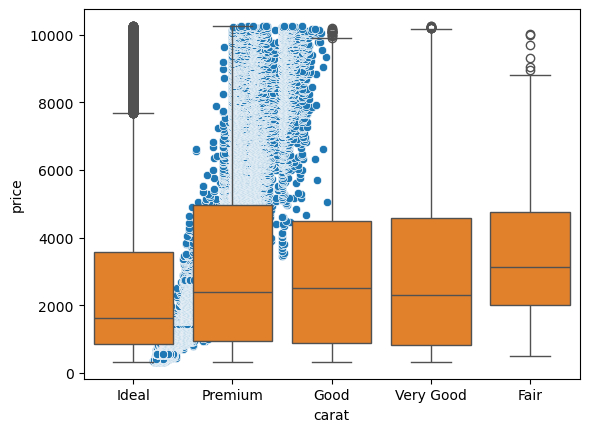

In [10]:
# Bivariate Analysis:

sns.scatterplot(x='carat', y='price', data=df)
sns.boxplot(x='cut', y='price', data=df)


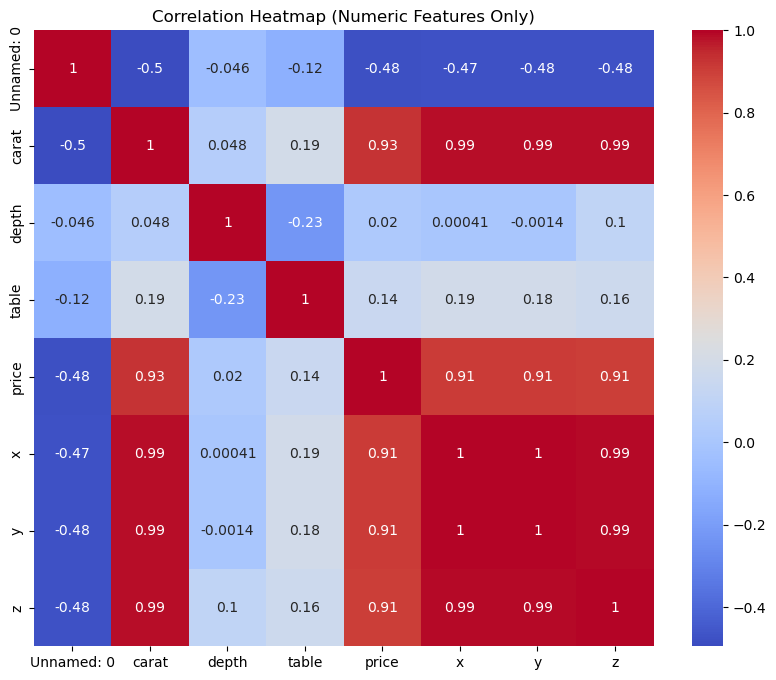

In [11]:
#Correlation Heatmap:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



In [12]:
# Feature Engineering

#Encode Categorical Variables:
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)





In [13]:
#Split Features and Target:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


In [14]:
#Feature Scaling:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#Random Forest with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
#Evaluate Final Model

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
